In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/train_LZdllcl.csv')
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop('employee_id', axis=1, inplace=True)
df.drop('region', axis=1, inplace=True)

In [7]:
df.is_promoted.value_counts()

,count
is_promoted,
0,50140
1,4668


In [8]:
df.isnull().sum()

,0
department,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0
awards_won?,0


In [9]:
print(df.education.mode())
df.education.fillna('Bachelor',inplace=True)

print(df.previous_year_rating.mean())
df.previous_year_rating.fillna(3.0,inplace=True)

0    Bachelor's
Name: education, dtype: object
3.329255780917055


/tmp/ipython-input-2514729900.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.education.fillna('Bachelor',inplace=True)
/tmp/ipython-input-2514729900.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [10]:
df.isnull().sum()

,0
department,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0
awards_won?,0


<Axes: >

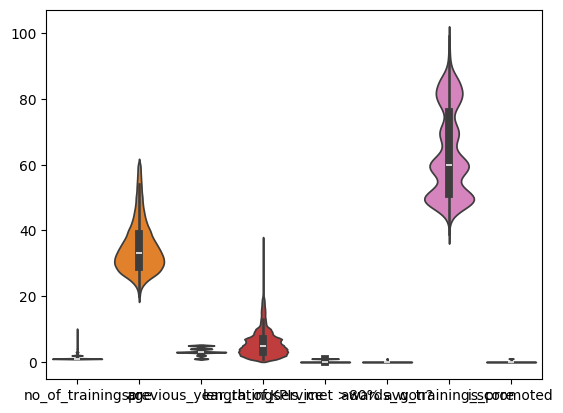

In [11]:
sns.violinplot(df)

In [12]:
df.select_dtypes(include=np.number).skew()

,0
no_of_trainings,3.445434
age,1.007432
previous_year_rating,-0.260858
length_of_service,1.738061
KPIs_met >80%,0.619909
awards_won?,6.338914
avg_training_score,0.451908
is_promoted,2.972339


In [13]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_cat_encoded = ohe.fit_transform(df_cat)
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat).toarray(), columns=ohe.get_feature_names_out())
df_cat_ohe.tail(3)

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
54805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
54806,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
54807,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
data = pd.concat([df_num, df_cat_ohe], axis=1)
data.tail(3)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
54805,1,27,5.0,3,1,0,79,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
54806,1,29,1.0,2,0,0,45,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
54807,1,27,1.0,5,0,0,49,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
x = data.drop('is_promoted', axis=1)
y = data.is_promoted

In [17]:
x = np.log1p(x.select_dtypes(include=np.number))

data= pd.concat([x, x.select_dtypes(exclude=np.number)], axis=1)

display(data.head())

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.693147,3.583519,1.791759,2.197225,0.693147,0.0,3.912023,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.000000,0.000000,0.0,0.693147,0.000000,0.0,0.693147
1,0.693147,3.433987,1.791759,1.609438,0.000000,0.0,4.110874,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,0.693147,0.0,0.000000
2,0.693147,3.555348,1.386294,2.079442,0.000000,0.0,3.931826,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.000000,0.693147,0.0,0.000000,0.693147,0.0,0.693147
3,1.098612,3.688879,0.693147,2.397895,0.000000,0.0,3.931826,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.000000,0.693147,0.0,0.000000,0.693147,0.0,0.000000
4,0.693147,3.828641,1.386294,1.098612,0.000000,0.0,4.304065,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.693147,0.693147,0.0,0.000000,0.693147,0.0,0.000000


In [18]:
data.skew()

,0
no_of_trainings,2.292700
age,0.496626
previous_year_rating,-0.936022
length_of_service,0.055984
KPIs_met >80%,0.619909
awards_won?,6.338914
avg_training_score,0.225670
department_Finance,4.319899
department_HR,4.440034
department_Legal,7.054982


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
# Models
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
}

results = []

for name, model in models.items():
      model.fit(x_train, y_train)
      y_train_pred = model.predict(x_train)
      y_test_pred = model.predict(x_test)

      report = classification_report(y_test, y_test_pred, output_dict=True)



      results.append({
        "Model": name,
        "Train Accuracy": round(accuracy_score(y_train, y_train_pred), 4),
        "Test Accuracy": round(accuracy_score(y_test, y_test_pred), 4),
        "Precision (macro avg)": round(report["macro avg"]["precision"], 4),
        "Recall (macro avg)": round(report["macro avg"]["recall"], 4),
        "F1-Score (macro avg)": round(report["macro avg"]["f1-score"], 4),
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy,Test Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg)
0,Logistic Regression,0.9290,0.9310,0.9098,0.5947,0.6395
1,KNN,0.9295,0.9178,0.7208,0.5610,0.5842
2,Decision Tree,0.9971,0.8969,0.6710,0.6923,0.6808
3,Random Forest,0.9971,0.9340,0.8341,0.6580,0.7080
4,AdaBoost,0.9228,0.9272,0.8927,0.5716,0.6052
5,XGBoost,0.9486,0.9429,0.9224,0.6728,0.7364
6,Gradient Boosting,0.9417,0.9423,0.9451,0.6600,0.7249
7,SVM,0.9214,0.9236,0.9616,0.5391,0.5525
8,Gaussian Naive Bayes,0.8942,0.8952,0.6058,0.5672,0.5798


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Taking Gradient Boosting for Fine tuning
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1_macro', n_jobs=-1, random_state=42) # Added n_iter and random_state
random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1-score (macro avg) found: ", random_search.best_score_)

# Evaluate the fine-tuned model on the test set
best_gb_model = random_search.best_estimator_
y_test_pred_gb = best_gb_model.predict(x_test)

print("\nClassification Report for Fine-tuned Gradient Boosting Model:")
print(classification_report(y_test, y_test_pred_gb))

Best parameters found:  {'learning_rate': np.float64(0.06824582803960838), 'max_depth': 5, 'n_estimators': 269}
Best F1-score (macro avg) found:  0.7402171357642094

Classification Report for Fine-tuned Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.92      0.34      0.50       908

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [23]:
unseen_df = pd.read_csv('/content/sample_data/test_2umaH9m.csv')

In [24]:
unseen_df.drop('employee_id', axis=1, inplace=True)
unseen_df.drop('region', axis=1, inplace=True)

In [25]:
print(unseen_df.education.mode())
unseen_df.education.fillna("Bachelor's",inplace=True)

print(unseen_df.previous_year_rating.mean())
unseen_df.previous_year_rating.fillna(3.0,inplace=True)

0    Bachelor's
Name: education, dtype: object
3.339145677645539


/tmp/ipython-input-3185192539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unseen_df.education.fillna("Bachelor's",inplace=True)
/tmp/ipython-input-3185192539.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [26]:
df_num_unseen = unseen_df.select_dtypes(include=np.number)
df_cat_unseen = unseen_df.select_dtypes(exclude=np.number)

df_cat_encoded_unseen = ohe.transform(df_cat_unseen)
df_cat_ohe_unseen = pd.DataFrame(df_cat_encoded_unseen.toarray(), columns=ohe.get_feature_names_out(df_cat.columns))

unseen_data = pd.concat([df_num_unseen, df_cat_ohe_unseen], axis=1)

unseen_data_log_scaled = np.log1p(unseen_data.select_dtypes(include=np.number))

unseen_data_processed = pd.concat([unseen_data_log_scaled, unseen_data.select_dtypes(exclude=np.number)], axis=1)

display(unseen_data_processed.head())

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.693147,3.218876,1.386294,0.693147,0.693147,0.0,4.356709,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.693147,0.693147,0.0,0.0,0.693147,0.0,0.693147
1,0.693147,3.465736,1.386294,1.791759,0.000000,0.0,3.951244,0.000000,0.693147,0.0,...,0.000000,0.0,0.000000,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.000000
2,0.693147,3.465736,0.693147,1.609438,0.000000,0.0,3.871201,0.000000,0.000000,0.0,...,0.000000,0.0,0.693147,0.000000,0.693147,0.0,0.0,0.693147,0.0,0.000000
3,1.386294,3.465736,1.098612,2.302585,0.000000,0.0,4.189655,0.000000,0.000000,0.0,...,0.693147,0.0,0.000000,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.000000
4,0.693147,3.433987,1.609438,2.079442,0.000000,0.0,4.127134,0.693147,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.693147,0.0,0.0,0.693147,0.0,0.693147


In [27]:
# Predict on the unseen data using the best Gradient Boosting model
unseen_predictions = best_gb_model.predict(unseen_data_processed)

display(unseen_predictions)

array([0, 0, 0, ..., 0, 0, 1])

In [29]:
sample_submission = pd.read_csv('/content/sample_data/sample_submission_M0L0uXE.csv')
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [32]:
# Create submission file
sample_submission['is_promoted'] = unseen_predictions
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [33]:
# Save to CSV for submission
sample_submission.to_csv('sample_submission_M0L0uXE.csv', index=False)

In [34]:
# To Download The File
from google.colab import files
files.download('sample_submission_M0L0uXE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>